In [1]:
import os
import pandas as pd
from src.gender import gender
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))

In [2]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

## Herectvo

In [3]:
hcf = hcf[["Film","Copyright","Režie","Scénář","Původní filmový námět","Hrají","Typologie"]]

In [4]:
def hlrole(x):
    try:
        x = x[0]
    except:
        x = x
    return x

In [5]:
hcf["Hlavní role"] = hcf["Hrají"].apply(lambda x: hlrole(x))

In [6]:
hcf["Gender hlavní role"] = hcf["Hlavní role"].apply(lambda x: gender(x))

In [7]:
hcf[["Film","Hlavní role","Gender hlavní role"]].sample(5)

,Film,Hlavní role,Gender hlavní role
3640,Kuličky (53944),None,None
4122,Bezva ženská na krku (400893),Petra Hřebíčková (18870),žena
842,Lidé pod horami (395772),František Kreuzmann (75624),muž
2287,Člověk není sám (396892),Jiřina Švorcová (25688),žena
2149,Farářův konec (396794),Vlastimil Brodský (833),muž


In [8]:
pomer_hl_roli = pd.Series(hcf[hcf["Gender hlavní role"] == "žena"].groupby("Copyright")["Hlavní role"].nunique() / hcf[(hcf["Gender hlavní role"] == "muž") | (hcf["Gender hlavní role"] == "žena")].groupby("Copyright")["Hlavní role"].nunique())

<AxesSubplot:xlabel='Copyright'>

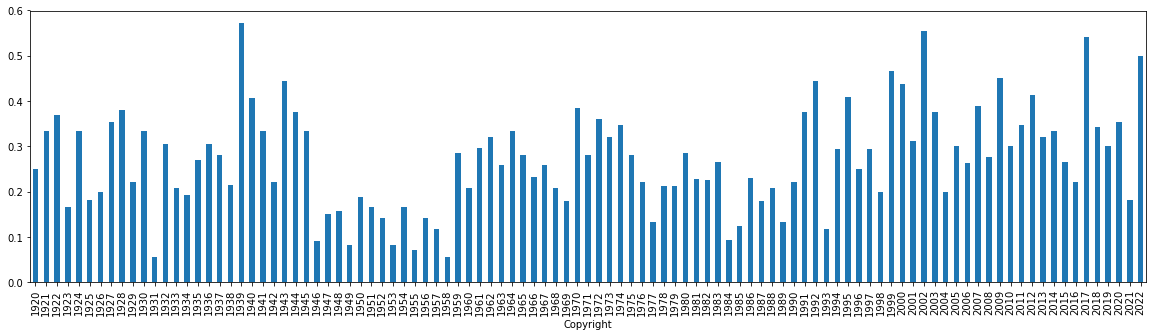

In [9]:
pomer_hl_roli.plot.bar(figsize=(20,5))

In [10]:
hcf = hcf.explode("Hrají")[["Film","Copyright","Režie","Hrají"]]

In [11]:
hcf["Gender"] = hcf["Hrají"].apply(lambda x: gender(x))

In [12]:
hcf[hcf["Gender"] == "žena"].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum()

Copyright
1920     28
1921     24
1922     43
1923     24
1924     32
       ... 
2018    187
2019    193
2020    143
2021    142
2022     16
Name: Hrají, Length: 103, dtype: int64

In [13]:
pomer_herecek = pd.Series(hcf[hcf["Gender"] == "žena"].groupby("Copyright")["Hrají"].nunique() / hcf[(hcf["Gender"] == "muž") | (hcf["Gender"] == "žena")].groupby("Copyright")["Hrají"].nunique())

In [14]:
pomer_herecek

Copyright
1920    0.271605
1921    0.273973
1922    0.247863
1923    0.236111
1924    0.242857
          ...   
2018    0.287645
2019    0.309963
2020    0.327320
2021    0.316489
2022    0.355556
Name: Hrají, Length: 103, dtype: float64

<AxesSubplot:xlabel='Copyright'>

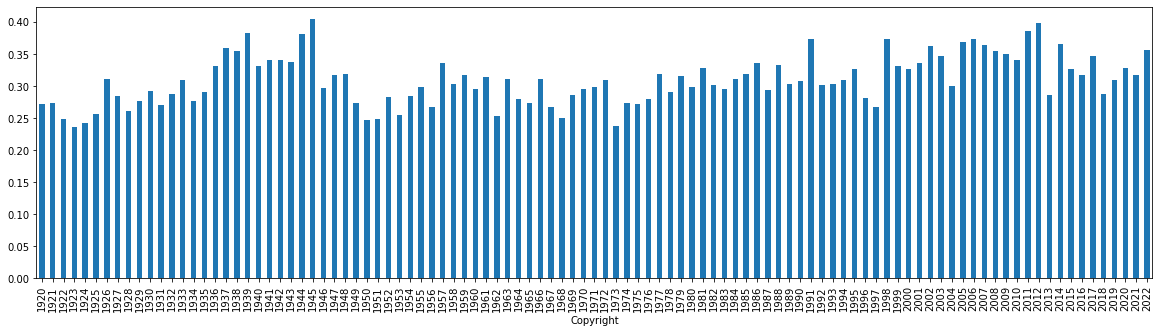

In [15]:
pomer_herecek.plot.bar(figsize=(20,5))

In [16]:
pomer_herecek = pd.Series(hcf[hcf["Gender"] == "žena"].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum() / hcf[(hcf["Gender"] == "muž") | (hcf["Gender"] == "žena")].groupby(["Copyright","Film"])["Hrají"].nunique().groupby("Copyright").sum(), name="Podíl hereček")

In [17]:
pomer_herecek

Copyright
1920    0.264151
1921    0.222222
1922    0.200000
1923    0.228571
1924    0.278261
          ...   
2018    0.293564
2019    0.296467
2020    0.317073
2021    0.324943
2022    0.355556
Name: Podíl hereček, Length: 103, dtype: float64

<AxesSubplot:xlabel='Copyright'>

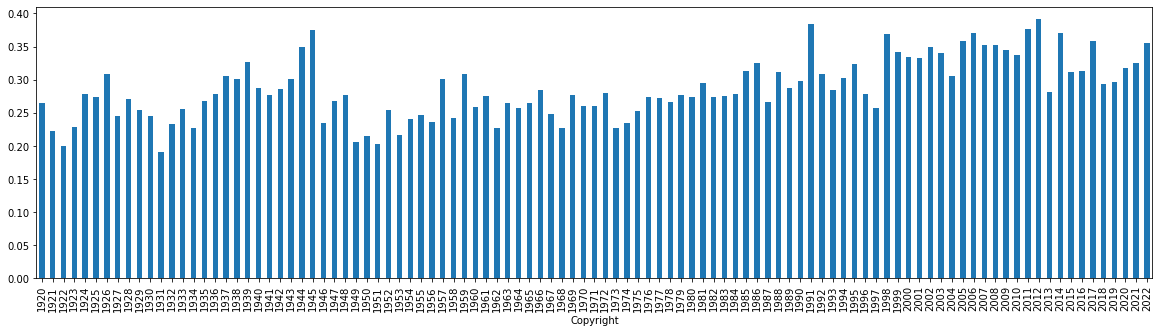

In [18]:
pomer_herecek.plot.bar(figsize=(20,5))

In [19]:
hcf[hcf["Gender"] == "žena"].groupby("Film")["Hrají"].nunique().sum() / hcf.groupby("Film")["Hrají"].nunique().sum()

0.28860240257837677

In [20]:
hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()

0.25045325045325045

In [21]:
hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()

0.34285159285159283

In [22]:
(hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum() - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / 20

0.004619917119917119

In [23]:
2023 + (0.5 - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / ((hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 2003)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum() - hcf[(hcf["Gender"] == "žena") & (hcf["Copyright"] >= 1983) & (hcf["Copyright"] <= 2002)].groupby("Film")["Hrají"].nunique().sum() / hcf[hcf["Copyright"] >= 2003].groupby("Film")["Hrají"].nunique().sum()) / 20)

2057.0154169586544

In [24]:
hcf[hcf["Gender"] == "muž"].groupby("Film")["Hrají"].nunique().nlargest()

Film
Osvobození Prahy (397108)       158
Dny zrady (396979)              130
Putování Jana Amose (397429)    121
Dvacátý devátý (397039)         117
Mazaný Filip (20319)            107
Name: Hrají, dtype: int64

In [25]:
hcf["Hrají"].nunique()

15360

In [26]:
hcf[hcf["Gender"] == "muž"]["Hrají"].nunique()

10088

In [27]:
hcf[hcf["Gender"] == "žena"]["Hrají"].nunique()

5272

## Herectvo

In [28]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [29]:
herectvo

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk
0,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vratné lahve,Vratné lahve (23639),2007,Hrají,důchodce v parku,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,55.0
1,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Nejistá sezóna,Nejistá sezóna (397550),1987,Hrají,kulisák Honza Melichar,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,35.0
2,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Vesničko má středisková,Vesničko má středisková (397480),1985,Hrají,bagrista Ferda,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,33.0
3,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika",Rozpuštěný a vypuštěný,Rozpuštěný a vypuštěný (397438),1984,Hrají,agent Ziegler,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,32.0
4,Jan Kašpar (10009),"JAN KAŠPAR (nar. 6.9.1952, Praha – zemřel 11. ...",06.09.1952,"Praha, Československo",11.06.2013,"Praha, Česká republika","Jára Cimrman, ležící, spící","Jára Cimrman, ležící, spící (397423)",1983,Hrají,krajánek,None,Praha,Československo,Česká republika,Česká republika,1952.0,2013.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86643,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Straka v hrsti,Straka v hrsti (397595),1987,Hrají,čeledín,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,39.0
86644,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Rekord,Rekord (397357),1982,Hrají,chlapec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,34.0
86645,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Opera ve vinici,Opera ve vinici (397330),1981,Hrají,přítel Jiří,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,33.0
86646,Rostislav Novák st. (person),None,25.11.1948,"Praha, Československo",None,None,Kalamita,Kalamita (397340),1980,Hrají,milenec,"Rosťa Novák, Rosťa Novák st.",Praha,Československo,None,None,1948.0,NaN,32.0


In [30]:
herectvo = herectvo.explode("Role")

In [31]:
herectvo[herectvo["Role"].str.lower().str.contains("princ",na=True)][["Jméno","Rok","Film","Role","Věk"]].sort_values(by="Věk",ascending=False).head(50)

,Jméno,Rok,Film,Role,Věk
62286,Ladislav Pešek (53326),1975,Prodaná nevěsta (397091),principál komediantů,69.0
48163,Marie Häusslerová (33648),1933,Pobočník Jeho Výsosti (395614),starší komorná princezny,67.0
48162,Marie Häusslerová (33648),1933,Pobočník Jeho Výsosti [německá verze] (395590),starší komorná princezny,67.0
58139,Martin Růžek (4934),1984,Komediant (397445),principál Fortunatus,66.0
52330,Theodor Pištěk (37366),1959,Princezna se zlatou hvězdou (396365),princův pobočník,64.0
80397,Harriet Walter (84392),2012,Královská aféra (182846),"Augusta, princezna z Walesu",62.0
26241,Antonín Bulík (130255),1938,Co se šeptá (395844),princ Lobkovic,60.0
41867,Ludmila Vostrčilová (27337),1978,Mladý muž a bílá velryba (397200),sekretářka Šprinclová,60.0
41839,Ludmila Vostrčilová (27337),1978,Mladý muž a bílá velryba (397200),sekretářka Šprinclová,60.0
47709,Radovan Lukavský (3301),1976,Malá mořská víla (397113),"král všech moří, otec šesti princezen",57.0


In [32]:
zanry = df[["Film","Žánr"]]

In [33]:
zanry

,Film,Žánr
0,Přenesení kolébky Františka Palackého z Hodsla...,reportáž
1,Cvičení s kužely Sokolů malostranských (401704),"[reportáž, sportovní]"
2,Cyklisté (401705),reportáž
3,Defilování vojska o Božím těle na Královských ...,reportáž
4,Hanácké banderium (401707),reportáž
...,...,...
4512,Mimořádná událost (402176),"[komedie, satira, bláznivá komedie]"
4513,Po čem muži touží 2 (402173),"[fantastický, komedie]"
4514,Až zařve lev (402204),"[historický, životopisný, esej]"
4515,Planeta Praha (402218),"[přírodopisný, rodinný]"


In [34]:
zanry.explode("Žánr").groupby("Žánr")["Film"].nunique().nlargest(50)

Žánr
komedie              978
drama                643
psychologický        412
příběh               229
povídka              228
reklamní             224
pohádka              216
dětský               188
historický           178
melodrama            164
dokument             133
kriminální           121
životopisný          113
hudební              112
etuda                110
satira                94
dobrodružný           91
hořká komedie         78
groteska              77
politický             76
povídkový             76
osvětový              71
reportáž              69
rodinný               69
sociální              68
detektivní            66
tragikomedie          61
umělecký              58
válečný               51
fantastický           47
thriller              47
medailon              43
sci-fi                43
smutná komedie        43
podobenství           42
poetický              42
road movie            42
časosběrný            42
esej                  40
propagační          

In [35]:
pohadky = ["pohádka","dětský","rodinný"]

In [36]:
herectvo = herectvo.merge(zanry, on="Film")

In [37]:
herectvo = herectvo.explode("Žánr")

In [38]:
herectvo[(herectvo["Role"].str.lower().str.contains("důchodce",na=True,regex=True))].groupby(["Jméno","Film","Role"])["Věk"].max().nsmallest(20)

Jméno                        Film                                 Role                                           
Lubomír Kostelka (841)       Přehlídce velím já! (396823)         invalidní důchodce Josef Rendl                     42.0
Josef Vinklář (4983)         Jakou barvu má láska (396997)        hlas důchodce Máchy                                43.0
Luděk Pilc (128781)          Nikdo se nebude smát (396650)        elegantní důchodce                                 43.0
Josef Somr (1054)            Evžen mezi námi (397316)             důchodce Koutný                                    47.0
Martin Finger (19835)        Zahradnictví: Nápadník (401672)      invalidní důchodce Jindřich Rohn, Vilmin manžel    47.0
Ondřej Malý (59148)          Učitelka (400766)                    invalidní důchodce Řehák                           50.0
Josef Koza (126437)          Zlá noc (396978)                     důchodce Kverka, výpomocný zámečník                52.0
Josef Burda (78901)          Jak

In [39]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20)

Jméno                      Film                                 Role                              
Jiří Maryško (81150)       Tajemství staré bambitky 2 (402174)  princ Oleandr, nápadník               41.0
Petr Hanuš (3548)          Třetí princ (397364)                 princ na koni                         39.0
Vladimír Zoubek (125641)   O medvědu Ondřejovi (396371)         princ Vítek                           39.0
Miroslav Kalný (131466)    O medvědu Ondřejovi (396371)         princ nápadník                        37.0
Soběslav Sejk (9018)       O medvědu Ondřejovi (396371)         princ Hynek                           37.0
Miroslav Horníček (13266)  Byl jednou jeden král... (396193)    princ krásný, syn Alabastra XVI.      36.0
Václav Neužil (9101)       Sedmero krkavců (400594)             princ Norbert                         36.0
Jiří Bartoška (827)        Třetí princ (397364)                 princ Jindřich                        35.0
Ondřej Vetchý (836)        Kouzelný měšec (85

In [40]:
herectvo[(herectvo["Film"] == "Tajemství staré bambitky 2 (402174)")]

,Jméno,Bio,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Titul,Film,Rok,Úloha,Role,Alternativní jména,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Věk,Žánr
1321,Petr Koutecký (10038),None,1954,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Mluví,hlas kočího,None,None,None,None,None,1954.0,NaN,67.0,pohádka
1322,Otmar Brancuzský (1063),None,13.02.1956,"Jihlava, Československo",22.10.2022,"Malý Beranov u Jihlavy, Česká republika",Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,generál,None,Jihlava,Československo,Česká republika,Česká republika,1956.0,2022.0,65.0,pohádka
1323,Martin Hanuš (1080),None,14.11.1964,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,jezdec na koni/kočí/dubl,None,None,None,None,None,1964.0,NaN,57.0,pohádka
1324,Leoš Noha (16926),None,04.05.1968,"Ústí nad Labem, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,sedlák Macháně,None,Ústí nad Labem,Československo,None,None,1968.0,NaN,53.0,pohádka
1325,Jan Šobor (17695),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,vesničan,None,None,None,None,None,NaN,NaN,NaN,pohádka
1326,Lucie Kožinová (17999),None,1969,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,Marie Švecová,None,None,None,None,None,1969.0,NaN,52.0,pohádka
1327,Dita Zábranská (22673),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,hostinská,None,None,None,None,None,NaN,NaN,NaN,pohádka
1328,Veronika Kubařová (26753),None,01.06.1987,"Rakovník, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,"[Zpívá, Hrají]",královna Julie I.,"Veronika Khek (provdaná), Veronika Khek Kubařová",Rakovník,Československo,None,None,1987.0,NaN,34.0,pohádka
1329,Veronika Kubařová (26753),None,01.06.1987,"Rakovník, Československo",None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,"[Zpívá, Hrají]",královna Julie I.,"Veronika Khek (provdaná), Veronika Khek Kubařová",Rakovník,Československo,None,None,1987.0,NaN,34.0,pohádka
1330,Matěj Merunka (35802),None,None,None,None,None,Tajemství staré bambitky 2,Tajemství staré bambitky 2 (402174),2021,Hrají,lesní adjunkt,None,None,None,None,None,NaN,NaN,NaN,pohádka


In [41]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

29.0

In [42]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

28.65

In [43]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20)

Jméno                      Film                                    Role                                
Jitka Ježková (5336)       O princezně, která se nesmála (179679)  princezna                               33.0
Stella Májová (67287)      Byl jednou jeden král... (396193)       princezna Zpěvanka                      31.0
Jorga Kotrbová (125595)    Honza málem králem (397135)             princezna                               30.0
Květa Fialová (5338)       Princezna se zlatou hvězdou (396365)    princezna Florindella                   30.0
Irena Kačírková (81377)    Byl jednou jeden král... (396193)       princezna Drahomíra                     29.0
Libuše Šafránková (2272)   Třetí princ (397364)                    princezna Milena/princezna ze skal      29.0
Sabina Laurinová (3857)    Z pekla štěstí 2 (1201)                 princezna Eufrozína                     29.0
Vlasta Fialová (5062)      Legenda o lásce (396257)                princezna Mechmene Banu                 28.0


In [44]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

22.5

In [45]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

22.65

In [46]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Jaroslav Hilbert (63466)      108.0
František Kovářík (126912)    104.0
Zdeněk Procházka (127279)     100.0
Zita Kabátová (839)            96.0
Miroslav Mráz (125568)         95.0
Name: Věk, dtype: float64

In [47]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x))

In [48]:
vyplneno = pd.Series(herectvo.groupby("Jméno")["Rok narození"].first(), name="vyplneno")
print(vyplneno[~vyplneno.isnull()].index.nunique())
print((vyplneno[vyplneno.isnull()].index.nunique()))

6335
5779


In [49]:
distribuce = pd.DataFrame(herectvo.groupby(["Film","Rok","Jméno","Věk","Gender"])["Rok úmrtí"].first().reset_index())

In [50]:
distribuce[distribuce["Rok úmrtí"].isnull()]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
5,"...A bílá bledla, až celkem ztmavla (397394)",1983,Martin Kubala (714),25.0,muž,NaN
...,...,...,...,...,...,...
65753,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Karel Vítek (126651),34.0,muž,NaN
65754,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Kateřina Frýbová (88894),21.0,žena,NaN
65755,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Ladislav Mrnka (126577),47.0,muž,NaN
65762,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Nora Krčmářová (128785),45.0,žena,NaN


In [51]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65771,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65772,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65773,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65774,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [52]:
distribuce = distribuce[(distribuce["Rok úmrtí"] >= (distribuce["Rok"] + 2)) | (distribuce["Rok úmrtí"].isnull())]

In [53]:
distribuce

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Dagmar Čárová (12058),25.0,žena,NaN
1,"...A bílá bledla, až celkem ztmavla (397394)",1983,Jiří Schwarz (1346),24.0,muž,NaN
2,"...A bílá bledla, až celkem ztmavla (397394)",1983,Karel Hovorka (76534),59.0,muž,1988.0
3,"...A bílá bledla, až celkem ztmavla (397394)",1983,Lucie Žulová (58489),31.0,žena,NaN
4,"...A bílá bledla, až celkem ztmavla (397394)",1983,Marta Malá (129700),30.0,žena,NaN
...,...,...,...,...,...,...
65771,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Vlastimil Hašek (35693),42.0,muž,1992.0
65772,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Blažek (126904),48.0,muž,1984.0
65773,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Kryzánek (81388),50.0,muž,1975.0
65774,"„Čtyři vraždy stačí, drahoušku“ (396882)",1970,Zdeněk Srstka (7960),35.0,muž,2019.0


In [54]:
distribuce[distribuce["Film"] == "Vlastníci (402008)"]

,Film,Rok,Jméno,Věk,Gender,Rok úmrtí
55802,Vlastníci (402008),2019,Andrej Polák (10913),40.0,muž,NaN
55803,Vlastníci (402008),2019,Dagmar Havlová (76136),68.0,žena,NaN
55804,Vlastníci (402008),2019,David Novotný (1834),50.0,muž,NaN
55805,Vlastníci (402008),2019,Halka Třešňáková (24197),47.0,žena,NaN
55806,Vlastníci (402008),2019,Jiří Lábus (838),69.0,muž,NaN
55807,Vlastníci (402008),2019,Jiří Černý (13756),37.0,muž,NaN
55808,Vlastníci (402008),2019,Klára Melíšková (13764),48.0,žena,NaN
55809,Vlastníci (402008),2019,Kryštof Hádek (1830),37.0,muž,NaN
55810,Vlastníci (402008),2019,Ladislav Trojan (10040),87.0,muž,2022.0
55811,Vlastníci (402008),2019,Ondřej Malý (59148),53.0,muž,NaN


In [55]:
distribuce.groupby("Film")["Věk"].mean().nlargest(10)

Film
Pomalu, ale slábnu (78814)                      86.500000
Panenství Lídy Baarové (400756)                 83.000000
Rosa & Dara: Co je to gravitace? (400674)       81.000000
Rosa & Dara: Jak velké jsou hvězdy? (400676)    81.000000
Rosa & Dara: Proč prší? (400672)                81.000000
Kouzelná skříň (397535)                         73.000000
Pamětnice (123955)                              72.266667
Pátá loď (401180)                               72.000000
Odborný dohled nad výkladem snu (401766)        71.750000
Až zařve lev (402204)                           70.333333
Name: Věk, dtype: float64

In [56]:
distribuce.groupby("Film")["Věk"].mean().nsmallest(10)

Film
Červená Karkulka (402180)                5.0
Potkal jsem ho v zoo (397759)           11.0
Psí historie (117009)                   11.5
Malý sen (396231)                       13.0
Školní úkol [německá verze] (401193)    13.0
Cesta do pravěku (396218)               14.4
Československý Ježíšek (395161)         15.0
Černý démant (398743)                   15.4
Jak Vašíček přišel k nohám (395247)     17.0
Kino (396465)                           17.0
Name: Věk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

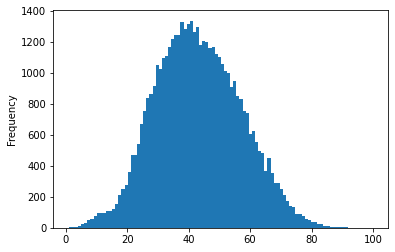

In [57]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].plot.hist(bins=98)

<AxesSubplot:ylabel='Frequency'>

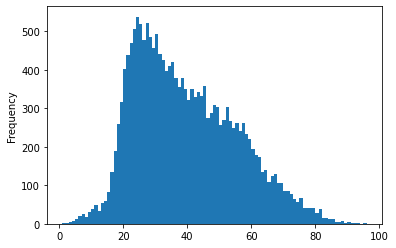

In [58]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].plot.hist(bins=95)

In [59]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].median()

43.0

In [60]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].median()

36.0

In [61]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].mode()

0    41.0
Name: Věk, dtype: float64

In [62]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].mode()

0    24.0
Name: Věk, dtype: float64

In [63]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].median()

46.0

In [64]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].median()

42.0

<AxesSubplot:ylabel='Frequency'>

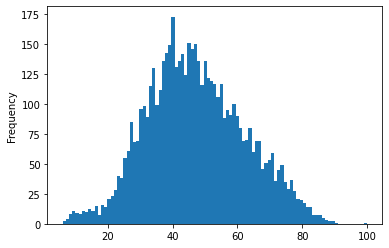

In [65]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].plot.hist(bins=95)

<AxesSubplot:ylabel='Frequency'>

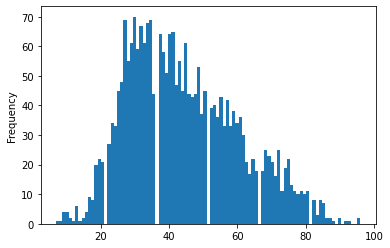

In [66]:
distribuce[(distribuce["Rok"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].plot.hist(bins=95)

## Režisérstvo

In [67]:
reziserstvo = df[["Copyright","Typologie","Délka","Žánr","Film","Režie"]]

In [68]:
reziserstvo = reziserstvo.explode("Režie").explode("Typologie").explode("Délka")

In [69]:
reziserstvo["Gender"] = reziserstvo["Režie"].apply(lambda x: gender (x))

In [70]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]

,Copyright,Typologie,Délka,Žánr,Film,Režie,Gender
3458,2003,animovaný,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3458,2003,distribuční,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3458,2003,studentský,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3459,2003,dokumentární,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3459,2003,distribuční,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
...,...,...,...,...,...,...,...
4500,2021,distribuční,dlouhometrážní,"[dobrodružný, rodinný]",Myši patří do nebe (402168),české verze Alice Hurychová (81624),žena
4508,2021,hraný,dlouhometrážní,"[komedie, parodie, bláznivá komedie]",Mstitel (402140),Lucia Klein Svoboda /ž/ (19838),žena
4508,2021,distribuční,dlouhometrážní,"[komedie, parodie, bláznivá komedie]",Mstitel (402140),Lucia Klein Svoboda /ž/ (19838),žena
4516,2022,dokumentární,dlouhometrážní,medailon,Identita ES (402166),Alena Činčerová (5732),žena


In [71]:
reziserstvo[(reziserstvo["Gender"] == "žena")]["Film"].nunique() / reziserstvo["Film"].nunique()

0.10418975836843272

In [72]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique() / reziserstvo[(reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.060237556561085974

In [73]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003)]["Film"].nunique()

0.24202626641651032

In [74]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.16464471403812825

<AxesSubplot:xlabel='Copyright'>

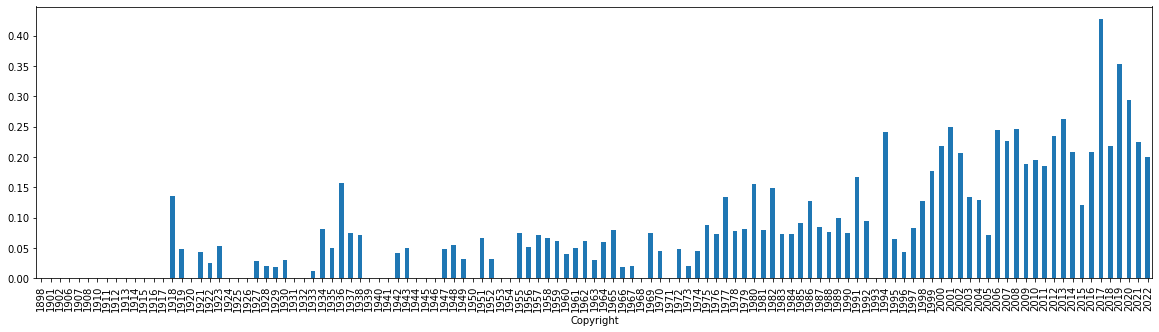

In [75]:
pomer_reziserek = pd.Series(reziserstvo[reziserstvo["Gender"] == "žena"].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

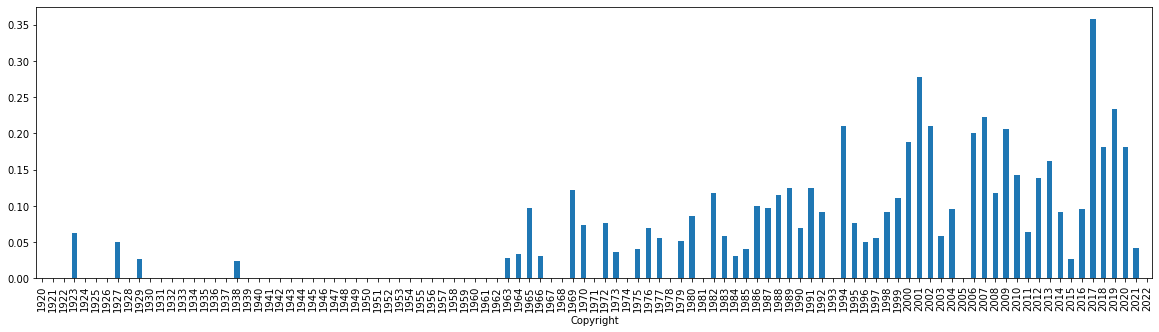

In [76]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [77]:
reziserstvo[reziserstvo["Gender"] == "žena"].groupby("Režie")[["Copyright","Film","Typologie"]].min().sort_values(by="Copyright")

,Copyright,Film,Typologie
Režie,,,
Olga Rautenkranzová (80115),1918,Kozlonoh (395165),distribuční
Hedvika Raabeová (124236),1918,Praha roku 1549 (395171),distribuční
Thea Červenková (73006),1919,Babička (395236),distribuční
Květoslava Semonická (128168),1927,Ve spárech upíra (395423),distribuční
Hermína Týrlová (4754),1928,Co jim schází? (398629),animovaný
...,...,...,...
Lucia Klein Svoboda /ž/ (19838),2021,Mstitel (402140),distribuční
Mária Pinčíková (122068),2021,Na značky! (402115),distribuční
Adéla Špaljová (3107),2021,Nebe (402085),distribuční


In [78]:
typy = reziserstvo["Typologie"].drop_duplicates().to_list()

In [79]:
for t in typy:
    try:
        muzi = reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[0]
        zeny = reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[1]
        print(f"""{t}: {zeny/(zeny+muzi)}, m: {muzi}, ž: {zeny}""")
    except:
        print(f"""{t}: m: {muzi}, ž: {zeny}""")

dokumentární: 0.3168044077134986, m: 248, ž: 115
distribuční: 0.24067164179104478, m: 814, ž: 258
hraný: 0.16351118760757316, m: 486, ž: 95
animovaný: 0.37593984962406013, m: 83, ž: 50
studentský: 0.509090909090909, m: 54, ž: 56
nedistribuční: m: 2, ž: 56
středometrážní: m: 2, ž: 56
krátkometrážní: 0.4, m: 6, ž: 4


<AxesSubplot:xlabel='Copyright'>

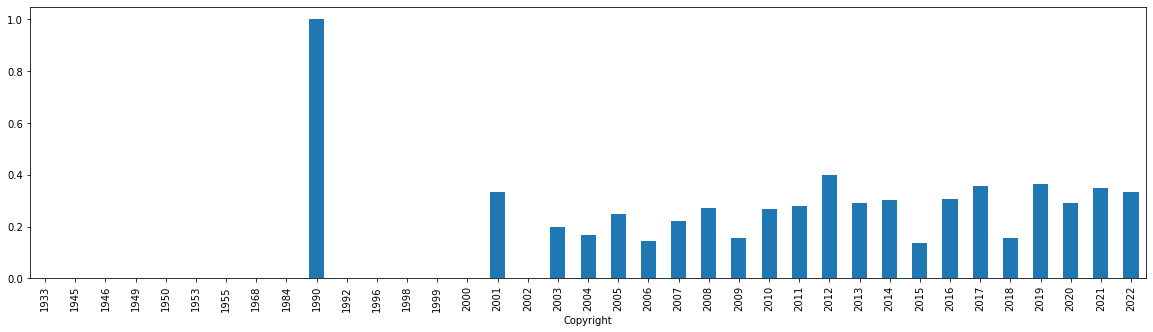

In [80]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

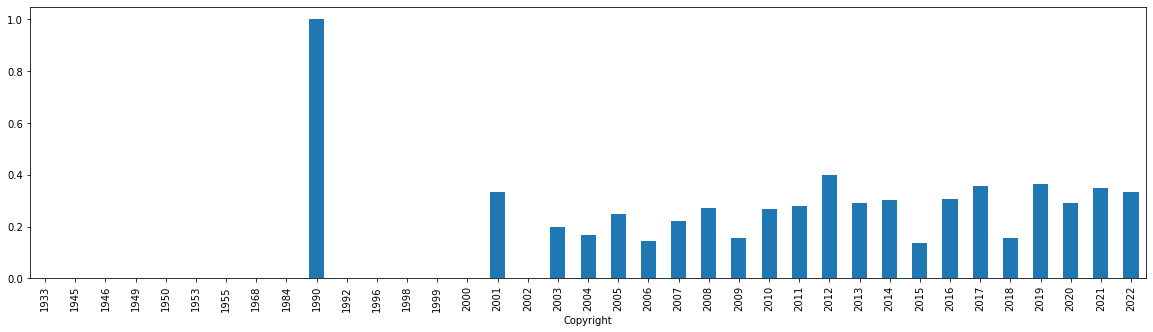

In [81]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [82]:
reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum()

Copyright
1898     18
1901      2
1902      2
1906      3
1907      2
       ... 
2018     87
2019    102
2020     58
2021     49
2022      5
Name: Film, Length: 119, dtype: int64

## Různé profese

In [83]:
df.columns.to_list()

['Film',
 'Země původu',
 'Copyright',
 'Rok výroby',
 'Premiéra',
 'Minutáž',
 'Režie',
 'Kategorie',
 'Žánr',
 'Typologie',
 'Originální název',
 'Český název',
 'Anglický název',
 'Souběžný název',
 'Pracovní název',
 'Hrají',
 'Postavy',
 'Pomocná režie',
 'Asistent režie',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Kamera',
 'Asistent kamery',
 'Architekt',
 'Návrhy kostýmů',
 'Masky',
 'Střih',
 'Zvuk',
 'Producent',
 'Vedoucí výroby',
 'Zástupce vedoucího výroby',
 'Odborný poradce',
 'Hudba',
 'Choreografie',
 'Lokace',
 'Distribuční slogan',
 'Výrobce',
 'S podporou',
 'Nositelé copyrightu',
 'Distribuce',
 'Délka',
 'Distribuční nosič',
 'Poměr stran',
 'Barva',
 'Zvukový systém/formát',
 'Verze',
 'Mluveno',
 'Podtitulky',
 'Úvodní/závěrečné titulky',
 'Anotace',
 'Obsah',
 'Technický scénář',
 'Výtvarník',
 'Animace',
 'Triky',
 'Postprodukce',
 'Návrhy titulků',
 'Pedagogické vedení',
 'Použitá hudba',
 'Studentský film',
 'Původní metráž',
 'Mezititulky',
 'Ocen

In [164]:
df["Animace"].drop_duplicates().to_list()

[None,
 'Ferdinand Fiala (127333)',
 'Hermína Týrlová (4754)',
 'Karel Dodal (127380)',
 ['Karel Dodal (127380)', 'Hermína Týrlová (4754)'],
 'György Pál (127408)',
 ['Hermína Týrlová (4754)', 'Irena Dodalová (78759)', 'Karel Dodal (127380)'],
 ['Hermína Týrlová (4754)', 'Karel Dodal (127380)'],
 ['Irena Dodalová (78759)', 'Karel Dodal (127380)'],
 'Karel Zeman (37288)',
 'Antonín Havlík (127417)',
 'kolektiv AFIT',
 ['Čeněk Duba (18227)', 'Stanislav Látal (4849)', 'Boris Masník (79760)'],
 ['Jaroslav Kándl (128003)',
  'Stanislav Látal (4849)',
  'Karel Štrebl (128005)'],
 'kolektiv Oddělení pro výrobu kresleného filmu Prag-Filmu',
 'František Vystrčil (52309)',
 ['Stanislav Látal (4849)',
  'Čeněk Duba (18227)',
  'Josef Kábrt (129799)',
  'Miloslav Krejčí (130408)',
  'Karel Mann (129803)',
  'Zdeněk Miler (5844)',
  'Bohuslav Šrámek (129804)',
  'Karel Štrebl (128005)'],
 'Boris Masník (79760)',
 ['František Vystrčil (52309)', 'Vladimír Lehký (92513)'],
 ['Zdeněk Hrabě (130229)',
 

In [161]:
profese = [
    "Hrají","Produkce", "Režie", "Pomocná režie", "Původní filmový námět","Scénář","Dramaturg","Architekt","Návrhy kostýmů","Masky","Střih","Producent",'Vedoucí výroby','Zástupce vedoucího výroby', 'Odborný poradce', 'Choreografie','Technický scénář', 'Výtvarník', 'Animace','Vedoucí produkce','Hudební režie', 'Dirigent','Skript', 'Kostýmy',"Kamera","Asistent kamery",
 'Asistent střihu',"Autor projektu","Koordinátor kaskadérů","Zpívá","Pedagogické vedení","Vedoucí výroby","Producent","Návrhy titulků","Kaskadéři","Asistent vedoucího produkce","Asistent zvuku","Asistent režie","Asistent kamery","Autor komentáře","Druhá kamera","Zástupce vedoucího produkce"
]

In [165]:
profesni_pomery = {}
for p in profese:
    df_pracovni = df[["Film","Copyright",p]].explode(p)
    df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x))
    profesni_pomery[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min(), df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min()]
profesni_pomery = pd.DataFrame.from_dict(profesni_pomery).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen", 4: "První muž", 5: "První žena"})
profesni_pomery.sort_values(by="Podíl žen",ascending=False)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1085.0,33.0,1052.0,0.969585,1944.0,1938.0
Asistent střihu,1107.0,138.0,969.0,0.875339,1945.0,1945.0
Kostýmy,1638.0,380.0,1258.0,0.768010,1931.0,1931.0
Zástupce vedoucího produkce,320.0,83.0,237.0,0.740625,1991.0,1991.0
Asistent vedoucího produkce,281.0,87.0,194.0,0.690391,1993.0,1952.0
Návrhy kostýmů,2010.0,715.0,1295.0,0.644279,1922.0,1932.0
Produkce,927.0,446.0,481.0,0.518878,1935.0,1954.0
Masky,4843.0,2712.0,2131.0,0.440017,1926.0,1945.0
Vedoucí produkce,836.0,472.0,364.0,0.435407,1991.0,1993.0
Zástupce vedoucího výroby,2238.0,1463.0,774.0,0.345845,1931.0,1949.0


In [185]:
profesni_pomery20 = {}
for p in profese:
    df_pracovni = df[df["Copyright"] >= 2003][["Film",p]].explode(p)
    df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x))
    profesni_pomery20[p] = [df_pracovni.groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum(), df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni.groupby("Film")[p].nunique().sum()]
profesni_pomery20 = pd.DataFrame.from_dict(profesni_pomery20).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen"})
profesni_pomery20.sort_values(by="Podíl žen",ascending=False)

,Celkem,Mužů,Žen,Podíl žen
Kostýmy,232.0,18.0,214.0,0.922414
Skript,219.0,22.0,197.0,0.899543
Návrhy kostýmů,593.0,110.0,483.0,0.814503
Zástupce vedoucího produkce,274.0,60.0,214.0,0.781022
Masky,988.0,263.0,725.0,0.733806
Asistent vedoucího produkce,264.0,80.0,184.0,0.696970
Zástupce vedoucího výroby,104.0,36.0,68.0,0.653846
Produkce,786.0,342.0,444.0,0.564885
Vedoucí výroby,358.0,199.0,159.0,0.444134
Vedoucí produkce,782.0,435.0,347.0,0.443734


## Věk

In [168]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [183]:
vek20 = {}
for p in profese:
    df_pracovni = df.explode("Typologie")
    df_pracovni = df_pracovni[(df_pracovni["Typologie"] == "hraný") & (df_pracovni["Délka"] == "dlouhometrážní")]
    df_pracovni = df_pracovni[df_pracovni["Copyright"] >= 2003][["Film","Copyright",p]].explode(p)
    df_pracovni = df_pracovni.merge(persony, left_on = p, right_on = "Jméno")
    df_pracovni["Věk"] = df_pracovni["Copyright"] - df_pracovni["Rok narození"]
    df_pracovni = df_pracovni[~(df_pracovni["Rok úmrtí"] < df_pracovni["Copyright"])]
    vek20[p] = [df_pracovni["Věk"].median(), df_pracovni["Věk"].mean(), df_pracovni["Věk"].min(), df_pracovni["Věk"].max()]
vek20 = pd.DataFrame.from_dict(vek20).transpose().rename(columns={0: "Průměrný věk", 1: "Medián", 2: "Nejnižší", 3: "Nejvyšší"})
vek20.sort_values(by="Medián",ascending=False)

,Průměrný věk,Medián,Nejnižší,Nejvyšší
Dramaturg,58.0,56.730047,22.0,88.0
Pedagogické vedení,53.0,56.114754,33.0,82.0
Skript,64.0,55.705882,30.0,71.0
Masky,57.0,54.857971,24.0,76.0
Odborný poradce,51.0,54.772727,32.0,91.0
Koordinátor kaskadérů,55.0,53.440594,27.0,72.0
Hudební režie,51.0,52.820513,33.0,73.0
Autor projektu,58.0,52.333333,41.0,58.0
Výtvarník,47.0,49.261538,27.0,86.0
Kaskadéři,49.0,49.187500,26.0,73.0
